In [1]:
!g++ -fopenmp gwo.cpp -o sp.out
!g++ -fopenmp gwo_parallel.cpp -o psp.out
!g++ -fopenmp multi_pack_gwo.cpp multi_pack_gwo.hpp -o mp.out
!g++ -fopenmp multi_pack_gwo_parallel.cpp multi_pack_gwo.hpp -o pmp.out

In [2]:
ROUNDS = 3

In [3]:
for i in range(ROUNDS):
    for num_wolves in range(10,51,10):
        for num_iter in range(50,51):
            !./sp.out $num_wolves $num_iter $i >> sp.csv
            !./psp.out $num_wolves $num_iter $i >> psp.csv
            !./mp.out 4 $num_wolves $num_iter $i >> mp.csv
            !./pmp.out 4 $num_wolves $num_iter $i >> pmp.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sp = pd.read_csv("sp.csv", header=None)
psp = pd.read_csv("psp.csv", header=None)
mp = pd.read_csv("mp.csv", header=None)
pmp = pd.read_csv("pmp.csv", header=None)

In [6]:
sp.columns = ["Round","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
psp.columns = ["Round","Wolves","No. Iterations", "Program Start time", "Thread initialization time","End time"]
mp.columns = ["Round","No. Packs","Wolves per pack","No. Iterations", "Program Start time", "Thread initialization time","End time"]
pmp.columns = ["Round","No. Packs","Wolves per pack","No. Iterations", "Program Start time", "Thread initialization time","End time"]

In [7]:
sp["Parallel exec time"] = sp["End time"]-sp["Thread initialization time"]
psp["Parallel exec time"] = psp["End time"]-psp["Thread initialization time"]
mp["Parallel exec time"] = mp["End time"]-mp["Thread initialization time"]
pmp["Parallel exec time"] = pmp["End time"]-pmp["Thread initialization time"]


In [8]:
sp["Total exec time"] = sp["End time"]-sp["Program Start time"]
psp["Total exec time"] = psp["End time"]-psp["Program Start time"]
mp["Total exec time"] = mp["End time"]-mp["Program Start time"]
pmp["Total exec time"] = pmp["End time"]-pmp["Program Start time"]


In [9]:
sp["Time per Iteration"] = (sp["End time"]-sp["Thread initialization time"])/sp["No. Iterations"]
psp["Time per Iteration"] = (psp["End time"]-psp["Thread initialization time"])/psp["No. Iterations"]
mp["Time per Iteration"] = (mp["End time"]-mp["Thread initialization time"])/mp["No. Iterations"]
pmp["Time per Iteration"] = (pmp["End time"]-pmp["Thread initialization time"])/pmp["No. Iterations"]


In [10]:
sp.drop(["Thread initialization time","Program Start time", "End time"], axis=1, inplace=True)
psp.drop(["Thread initialization time","Program Start time", "End time"], axis=1, inplace=True)
mp.drop(["Thread initialization time","Program Start time", "End time"], axis=1, inplace=True)
pmp.drop(["Thread initialization time","Program Start time", "End time"], axis=1, inplace=True)

In [25]:
x = [0 for i in range(ROUNDS)]
y = [0 for i in range(ROUNDS)]
z = [0 for i in range(ROUNDS)]

for i in range(sp.shape[0]):
    x[sp["Round"][i]] += sp["Total exec time"][i]
    y[sp["Round"][i]] += sp["Parallel exec time"][i]
    z[sp["Round"][i]] += sp["Time per Iteration"][i]
    
x = [i/ROUNDS for i in x]
y = [i/ROUNDS for i in y]
z = [i/ROUNDS for i in z]

sp["Average Total exec time"] = [x[i] for i in  sp["Round"]]
sp["Average Parallel exec time"] = [y[i] for i in  sp["Round"]]
sp["Average Time per Iteration"] = [z[i] for i in  sp["Round"]]


In [26]:
x = [0 for i in range(ROUNDS)]
y = [0 for i in range(ROUNDS)]
z = [0 for i in range(ROUNDS)]

for i in range(psp.shape[0]):
    x[psp["Round"][i]] += psp["Total exec time"][i]
    y[psp["Round"][i]] += psp["Parallel exec time"][i]
    z[psp["Round"][i]] += psp["Time per Iteration"][i]
    
x = [i/ROUNDS for i in x]
y = [i/ROUNDS for i in y]
z = [i/ROUNDS for i in z]

psp["Average Total exec time"] = [x[i] for i in  psp["Round"]]
psp["Average Parallel exec time"] = [y[i] for i in  psp["Round"]]
psp["Average Time per Iteration"] = [z[i] for i in  psp["Round"]]


In [27]:
x = [0 for i in range(ROUNDS)]
y = [0 for i in range(ROUNDS)]
z = [0 for i in range(ROUNDS)]

for i in range(mp.shape[0]):
    x[mp["Round"][i]] += mp["Total exec time"][i]
    y[mp["Round"][i]] += mp["Parallel exec time"][i]
    z[mp["Round"][i]] += mp["Time per Iteration"][i]
    
x = [i/ROUNDS for i in x]
y = [i/ROUNDS for i in y]
z = [i/ROUNDS for i in z]

mp["Average Total exec time"] = [x[i] for i in  mp["Round"]]
mp["Average Parallel exec time"] = [y[i] for i in  mp["Round"]]
mp["Average Time per Iteration"] = [z[i] for i in  mp["Round"]]


In [28]:
x = [0 for i in range(ROUNDS)]
y = [0 for i in range(ROUNDS)]
z = [0 for i in range(ROUNDS)]

for i in range(pmp.shape[0]):
    x[pmp["Round"][i]] += pmp["Total exec time"][i]
    y[pmp["Round"][i]] += pmp["Parallel exec time"][i]
    z[pmp["Round"][i]] += pmp["Time per Iteration"][i]
    
x = [i/ROUNDS for i in x]
y = [i/ROUNDS for i in y]
z = [i/ROUNDS for i in z]

pmp["Average Total exec time"] = [x[i] for i in  pmp["Round"]]
pmp["Average Parallel exec time"] = [y[i] for i in  pmp["Round"]]
pmp["Average Time per Iteration"] = [z[i] for i in  pmp["Round"]]


In [50]:
psp["Speed up"] = sp["Average Parallel exec time"]/psp["Average Parallel exec time"]
pmp["Speed up"] = mp["Average Parallel exec time"]/pmp["Average Parallel exec time"]

In [51]:
randwolf = 40
randiter = 50

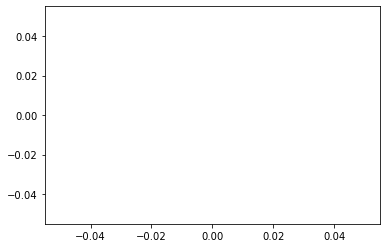

In [52]:
plt.plot(psp[psp["Wolves"]==randwolf]["No. Iterations"],psp[psp["Wolves"]==randwolf]["Speed up"])

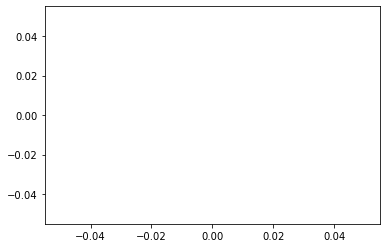

In [53]:
plt.plot(pmp[pmp["Wolves per pack"]==randwolf]["No. Iterations"],pmp[pmp["Wolves per pack"]==randwolf]["Speed up"])

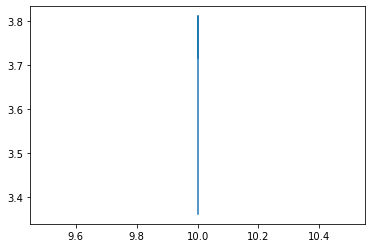

In [54]:
plt.plot(psp[psp["No. Iterations"] == randiter]["Wolves"], psp[psp["No. Iterations"] == randiter]["Speed up"])

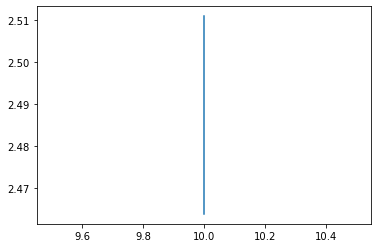

In [55]:
plt.plot(pmp[pmp["No. Iterations"] == randiter]["Wolves per pack"], pmp[pmp["No. Iterations"] == randiter]["Speed up"])

In [56]:
psp["Efficiency"] = (psp["Speed up"]/8)*100
